# Generating embeddings

In [1]:
from sentence_transformers import SentenceTransformer
from openai import OpenAI
from dotenv import load_dotenv
import os
from sklearn.metrics.pairwise import cosine_similarity
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
load_dotenv()

True

In [3]:
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

### Sample chunks

In [4]:
chunks = [
    "The sun set behind the mountains, casting a golden glow on the valley below.",
    "They walked slowly along the beach, the sound of waves crashing in the distance.",
    "She eagerly opened the letter, hoping for good news about her application.",
    "The dog barked loudly as the mail carrier approached the house.",
    "Our meeting at 3 PM will cover budget adjustments for the upcoming project.",
    "Please ensure all team members are briefed on the latest developments before the call.",
    "We should schedule a follow-up discussion next week to review our progress.",
    "I’ll send out the presentation slides after the meeting concludes today.",
    "The data shows a significant improvement in sales since the new campaign launched.",
    "We should analyze the feedback from customers to adjust our approach moving forward."
]

random.shuffle(chunks)

### Cosine similarity and top-k function

In [5]:
def similarities(embeddings, chunks):
    cosine_similarity_matrix = cosine_similarity(embeddings)
    print(f"Cosine similarities")
    print(f"{cosine_similarity_matrix}")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cosine_similarity_matrix, annot=True, cmap='Blues', xticklabels=chunks, yticklabels=chunks)
    plt.title("Cosine Similarity Matrix")
    plt.show()
    most_similar_idx = np.unravel_index(np.argmax(cosine_similarity_matrix, axis=None), cosine_similarity_matrix.shape)
    print(f"Top similar chunks")
    print(f"'{chunks[0]}' and '{chunks[1]}''")

### Sentence Transformer embeddings

Sentence transformer embeddings have been largely recommended for their abilities in document semantic similarity tasks. They're also able to run locally and don't add to costs for smaller models.

For this section, we are using the all-MiniLM-L6-v2 model

In [6]:
st_model = SentenceTransformer("all-MiniLM-L6-v2")

In [7]:
st_embeddings = st_model.encode(chunks)

In [8]:
st_embeddings.shape

(10, 384)

### OpenAI embeddings

OpenAI's text-embedding-ada-002 model has also been used in prior projects to produce decent results. However, there are costs associated with their use.

In [9]:
client = OpenAI(
    api_key = OPENAI_API_KEY
)

In [10]:
response = client.embeddings.create(
    model="text-embedding-ada-002",
    input=chunks
)

In [11]:
ada_embeddings = np.array([item.embedding for item in response.data])

In [12]:
ada_embeddings.shape

(10, 1536)

### Comparison

Cosine similarities
[[ 1.00000024e+00  7.17251152e-02 -5.26920930e-02  1.66583396e-02
   1.70138061e-01 -1.22127775e-02  2.14550957e-01 -2.84644775e-02
   3.04028150e-02  1.16088642e-02]
 [ 7.17251152e-02  1.00000000e+00  5.14330566e-01  3.54803383e-01
   5.49414679e-02  3.33123744e-01  1.87457591e-01  3.15505385e-01
   1.45383431e-02  3.60691875e-01]
 [-5.26920930e-02  5.14330566e-01  1.00000012e+00  1.81936637e-01
  -5.33979386e-04  4.74599063e-01  1.39281720e-01  3.88153851e-01
   9.91497422e-04  4.13970143e-01]
 [ 1.66583396e-02  3.54803383e-01  1.81936637e-01  1.00000000e+00
  -1.22760888e-02  1.77476466e-01  1.87675491e-01  2.01273844e-01
   6.01191670e-02  2.29332879e-01]
 [ 1.70138061e-01  5.49414679e-02 -5.33979386e-04 -1.22760888e-02
   1.00000000e+00  8.57933760e-02  6.22079819e-02  3.34796309e-02
   1.03157386e-01  2.86349878e-02]
 [-1.22127775e-02  3.33123744e-01  4.74599063e-01  1.77476466e-01
   8.57933760e-02  1.00000012e+00  2.14899480e-01  3.30074608e-01
   8.41146894

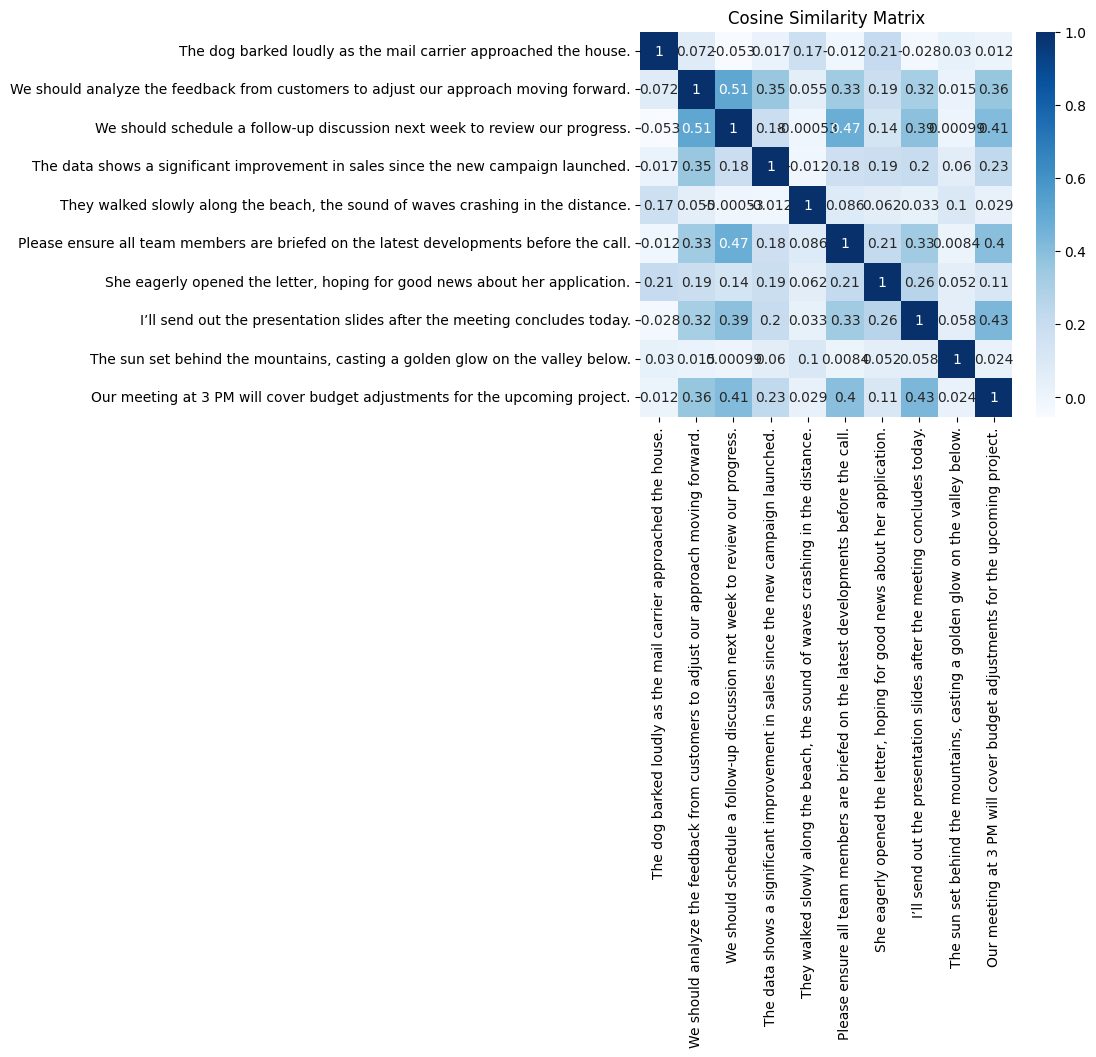

Top similar chunks
'The dog barked loudly as the mail carrier approached the house.' and 'We should analyze the feedback from customers to adjust our approach moving forward.''


In [13]:
similarities(st_embeddings, chunks)

Cosine similarities
[[1.         0.72444016 0.71502287 0.72778645 0.79653828 0.72187819
  0.81581969 0.71061387 0.77018567 0.70441543]
 [0.72444016 1.         0.84004953 0.80196313 0.73483568 0.77961487
  0.73751978 0.74912084 0.72973479 0.78659893]
 [0.71502287 0.84004953 1.         0.76032352 0.74157011 0.80368148
  0.75196988 0.82360466 0.73150054 0.83556689]
 [0.72778645 0.80196313 0.76032352 1.         0.72575874 0.73750763
  0.74852535 0.72759899 0.7442539  0.73820889]
 [0.79653828 0.73483568 0.74157011 0.72575874 1.         0.72222595
  0.75414828 0.71711959 0.83837648 0.71836628]
 [0.72187819 0.77961487 0.80368148 0.73750763 0.72222595 1.
  0.73841327 0.78590128 0.71986211 0.81331747]
 [0.81581969 0.73751978 0.75196988 0.74852535 0.75414828 0.73841327
  1.         0.7436418  0.75934469 0.73936249]
 [0.71061387 0.74912084 0.82360466 0.72759899 0.71711959 0.78590128
  0.7436418  1.         0.74117553 0.80664193]
 [0.77018567 0.72973479 0.73150054 0.7442539  0.83837648 0.71986211


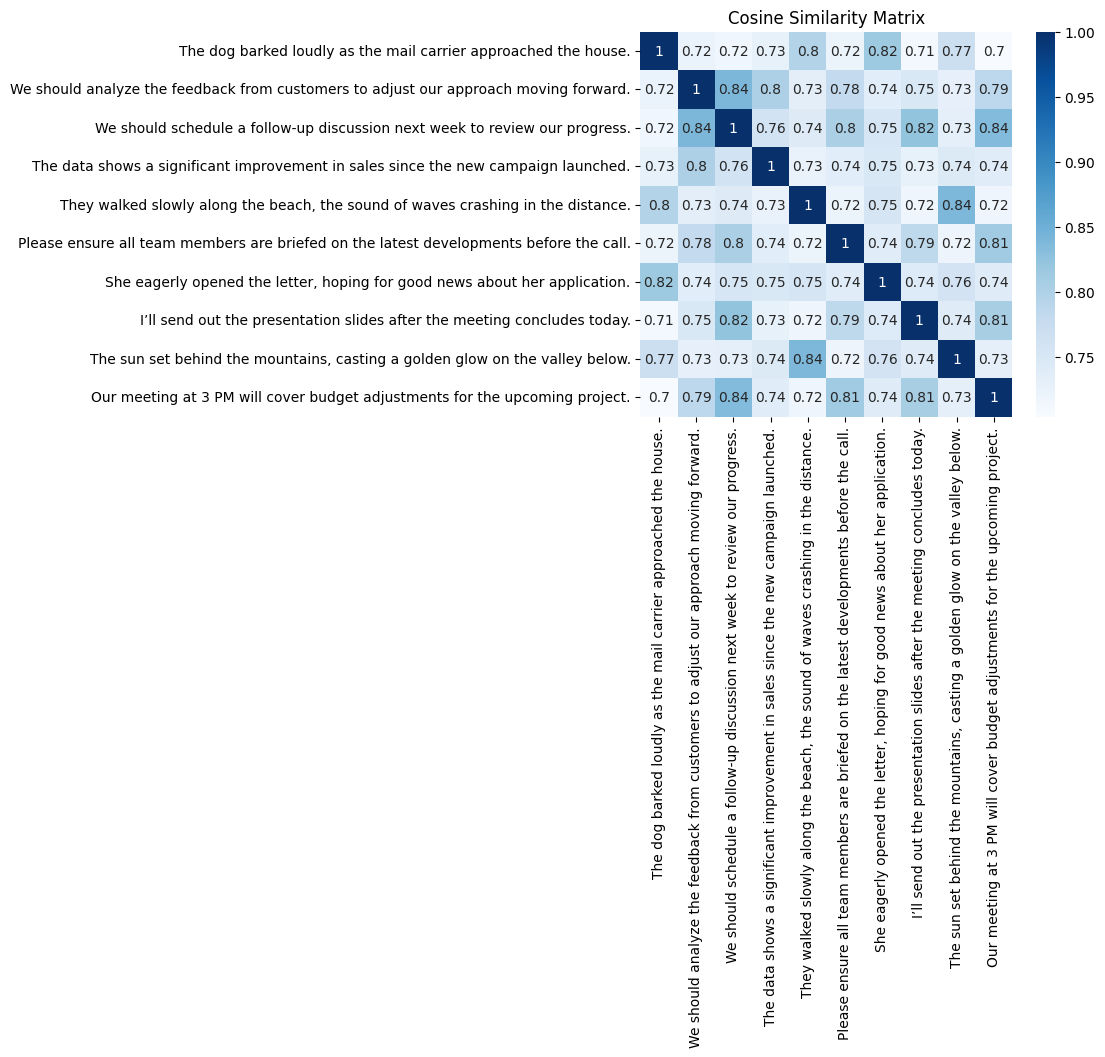

Top similar chunks
'The dog barked loudly as the mail carrier approached the house.' and 'We should analyze the feedback from customers to adjust our approach moving forward.''


In [14]:
similarities(ada_embeddings, chunks)

In our pipeline, however, we use the text-embedding-ada-002 model entirely. The reasons behind this are:
<ul>
    <li>Close compatibility with OpenAI's LLMs which we use for text generation</li>
    <li>Easy integration into Pinecone, our vector database of choice</li>
    <li>Better suited to a wide range of tasks given the vast training corpus</li>
    <li>Higher dimension (1586) than all-MiniLM-L6-v2 (384)</li>
    <li>The cost was incredibly manageable</li>
</ul>